In [5]:
#  1. Load the csv file and show top 5 records from it. 
#  2. How you would be able to see each column's name. 
#  3. Need to show number of rows and columns of this dataset. 
#  4. Show number of players and their countries. 
#  5. If you find many records in point 4 then show only top 10 countries and their number of players. 
#  6. Now  you  have  to  create  a  bar  plot  of  top  5  countries  and  their  number  of players, try to fill green color in bars. 
#  7. Show top 5 players short name and wages. 
#  8. Show top 5 players short name and wages that are getting highest salaries. 
#  9. Create a bar plot of point number 8. 
#  10. Show top 10 records of Germany. 
#  11. Now  show  top  5  records  of  Germany  players  who  have  maximum  height, weight and wages. 
#  12. Show short name and wages of top 5 Germany players. 
#  13. Show top 5 players who have great shooting skills among all with short name.

In [6]:
#year, stats do not need to be floats can convert it to an integer
#team_jersey_number to int
#nation_jersey_number
#release clause eur to usd and to float
#some of the body types are incorrect
#drop ID since there we are doing no normalization

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
from ETL import dataCleaner

In [8]:
df = dataCleaner(pd.read_csv('players_20.csv'))
pd.set_option('display.max_columns', 10)

- Goalkeeper
- Right Full-back (or Wingback)
- Left Full-back (or Wingback)
- Center-back
- Center back (or sweeper)
- Defensive Midfielder
- Right Midfielder (or Winger)
- Center Midfielder
- Center Forward (or Striker)
- Attacking Midfielder (or Center Forward)
- Left Midfielder (or Winger)

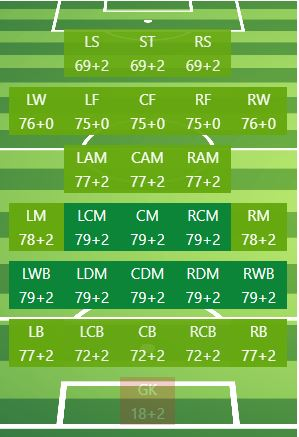

In [9]:
Image(filename='images\project1 screen show 1.JPG')

1. Load the csv file and show top 5 records from it. 

In [10]:
df.head()

,player_url,short_name,long_name,age,dob,...,lb,lcb,cb,rcb,rb
0,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,...,63+2,52+2,52+2,52+2,63+2
1,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,...,61+3,53+3,53+3,53+3,61+3
2,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,...,61+3,46+3,46+3,46+3,61+3
3,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,...,NaN,NaN,NaN,NaN,NaN
4,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,...,61+3,49+3,49+3,49+3,61+3


2. How you would be able to see each column's name.

In [11]:
pd.set_option('display.max_columns', None)
df.head(0)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb


3. Need to show number of rows and columns of this dataset. 

In [12]:
pd.set_option('display.max_rows', 10)
print(f'number of rows: {df.shape[0]}')
print(f'number of columns: {df.shape[1]}')

number of rows: 18278
number of columns: 103


4. Show number of players and their countries.

In [13]:
player_num_by_country = df.groupby(['nationality']).agg(Players=('short_name','count'))
player_num_by_country

,Players
nationality,
Afghanistan,2
Albania,43
Algeria,50
Angola,16
Antigua & Barbuda,7
...,...
Venezuela,66
Vietnam,1
Wales,117


5. Show only top 10 countries and their number of players.

In [14]:
pd.set_option('display.max_rows', 10)
player_num_by_country = player_num_by_country.sort_values('Players', ascending=False).head(10)
player_num_by_country['country'] = player_num_by_country.index
player_num_by_country.reset_index(drop=True)

,Players,country
0,1667,England
1,1216,Germany
2,1035,Spain
3,984,France
4,886,Argentina
5,824,Brazil
6,732,Italy
7,591,Colombia
8,453,Japan
9,416,Netherlands


6. Now  you  have  to  create  a  bar  plot  of  top  5  countries  and  their  number  of players, try to fill green color in bars.

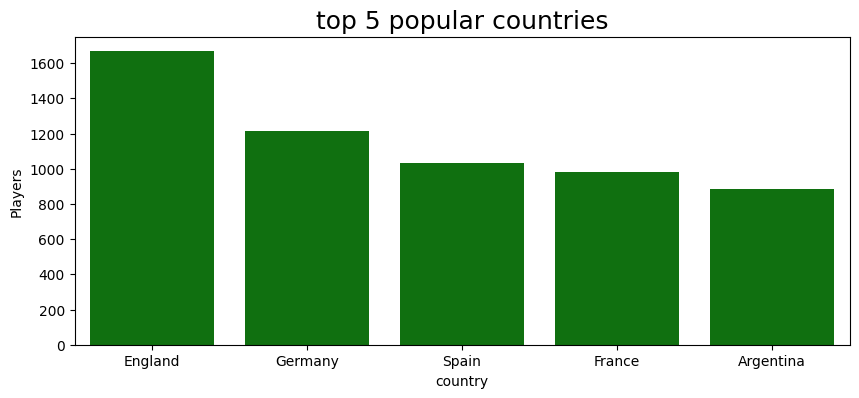

In [15]:
player_num_by_country = player_num_by_country.sort_values('Players', ascending=False).head()
player_num_by_country['country'] = player_num_by_country['country'].astype('str')
plt.figure(figsize=(10,4))
sns.barplot(data=player_num_by_country,x='country', y='Players', color='green')
plt.title('top 5 popular countries', fontsize=18)
plt.show()

7. Show top 5 players short name and wages. 

In [16]:
names_wages = df[['short_name', 'wage_usd']]
names_wages.head()

,short_name,wage_usd
0,L. Messi,678000
1,Cristiano Ronaldo,486000
2,Neymar Jr,348000
3,J. Oblak,150000
4,E. Hazard,564000


8. Show top 5 players short name and wages that are getting highest salaries.

In [17]:
names_wages = names_wages.sort_values('wage_usd', ascending=False).head()
names_wages

,short_name,wage_usd
0,L. Messi,678000
4,E. Hazard,564000
1,Cristiano Ronaldo,486000
5,K. De Bruyne,444000
22,A. Griezmann,444000


In [18]:
from bokeh.plotting import figure, show
from bokeh.models import ColumnDataSource
from bokeh.palettes import Spectral5

source = ColumnDataSource(data=dict(short_name=names_wages['short_name'], wage_usd=names_wages['wage_usd'], color=Spectral5))

p = figure(x_range=names_wages['short_name'], height=350, title="Top 5 Wages")
p.vbar(x='short_name', top='wage_usd', width=0.9, color='color', legend_field="short_name", source=source)

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.legend.orientation = "horizontal"
p.legend.location = "top_center"

show(p)

9. Create a bar plot of point number 8.

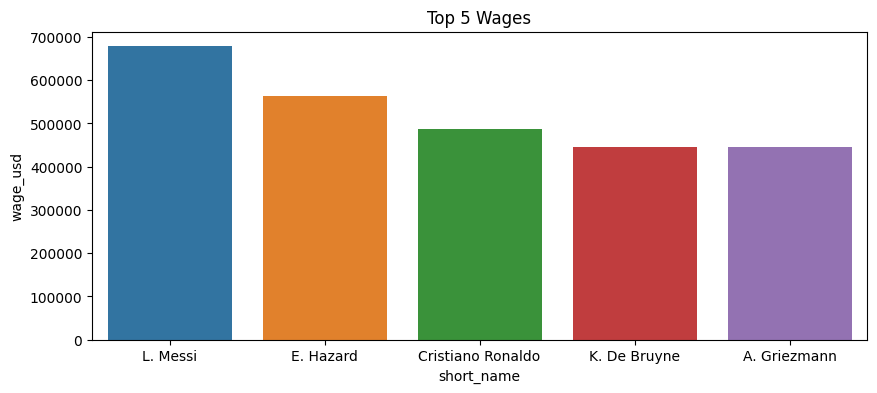

In [19]:
plt.figure(figsize=(10,4))
sns.barplot(data=names_wages,x='short_name', y='wage_usd')
plt.title('Top 5 Wages')
plt.show()

10. Show top 10 records of Germany. 

In [20]:
germany_only = df[df['nationality'] == 'Germany']
germany_only.head(10)

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
6,https://sofifa.com/player/192448/marc-andre-te...,M. ter Stegen,Marc-André ter Stegen,27,1992-04-30,187,85,Germany,FC Barcelona,90,93,81000000,300000,GK,Right,3,4,1,Medium/Medium,Normal,Yes,172080000,NaN,GK,1,NaN,2014-07-01,2022,SUB,22,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,88,85,88,90,45,88,"Swerve Pass, Acrobatic Clearance, Flair Passes",18,14,11,61,14,21,18,12,63,30,38,50,37,86,43,66,79,35,78,10,43,22,11,70,25,70,25,13,10,88,85,88,88,90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,33,1986-03-27,193,92,Germany,FC Bayern München,88,88,38400000,186000,GK,Right,5,4,1,Medium/Medium,Normal,Yes,63360000,NaN,GK,1,NaN,2011-07-01,2021,GK,1,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,87,87,91,87,57,85,"Power Free-Kick, Flair, Swerve Pass, Acrobatic...",15,13,25,55,11,30,14,11,59,46,54,60,51,84,35,68,77,43,80,16,29,30,12,70,47,70,17,10,11,87,87,91,85,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36,https://sofifa.com/player/182521/toni-kroos/20...,T. Kroos,Toni Kroos,29,1990-01-04,183,76,Germany,Real Madrid,88,88,68400000,396000,CM,Right,4,5,3,Medium/Medium,Normal,Yes,140280000,"#Playmaker , #Crosser, #Complete Midfielder",LCM,8,NaN,2014-07-17,2023,SUB,8,45,80,90,81,70,69,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Argues with Officials, Finesse Shot, Crowd Fav...",88,75,58,91,82,80,86,84,92,89,50,41,60,87,71,87,30,74,73,86,60,76,75,89,73,88,72,70,62,10,11,13,7,10,75+3,75+3,75+3,78+3,79+3,79+3,79+3,78+3,81+3,81+3,81+3,79+3,85+3,85+3,85+3,79+3,75+3,79+3,79+3,79+3,75+3,72+3,69+3,69+3,69+3,72+3
37,https://sofifa.com/player/188350/marco-reus/20...,M. Reus,Marco Reus,30,1989-05-31,180,71,Germany,Borussia Dortmund,88,88,67200000,204000,"CAM, LM, ST",Right,4,4,4,High/Medium,Lean,Yes,110880000,"#Dribbler, #Playmaker , #Distance Shooter, #F...",CAM,11,NaN,2012-07-01,2023,ST,11,85,88,84,87,45,66,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Power Free-Kick, Avoids Using Weaker Foot, Bea...",82,87,49,86,90,87,89,86,77,88,85,85,86,87,84,88,71,76,67,87,51,48,89,86,90,85,49,37,45,12,12,13,13,11,82+3,82+3,82+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,86+3,85+3,80+3,80+3,80+3,85+3,69+3,65+3,65+3,65+3,69+3,64+3,55+3,55+3,55+3,64+3
49,https://sofifa.com/player/178603/mats-hummels/...,M. Hummels,Mats Hummels,30,1988-12-16,191,94,Germany,Borussia Dortmund,87,87,49200000,156000,CB,Right,4,3,3,High/Medium,Normal,Yes,81240000,"#Tackling , #Tactician",LCB,15,NaN,2019-07-01,2022,NaN,<NA>,51,58,76,72,89,76,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Avoids Using Weaker Foot, Leadership, Finesse ...",64,55,87,81,60,68,65,53,85,81,46,55,64,87,59,71,68,65,85,51,71,89,56,79,68,89,90,89,86,15,6,10,5,6,68+3,68+3,68+

11. Now  show  top  5  records  of  Germany  players  who  have  maximum  height, weight and wages. 

In [90]:
top_5_german_only = germany_only.sort_values(['height_cm', 'weight_kg', 'wage_usd'], ascending=[False, False, False]).head(5)
top_5_german_only

,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
8016,https://sofifa.com/player/236831/aaron-seydel/...,A. Seydel,Aaron Seydel,23,1996-02-07,199,90,Germany,1. FSV Mainz 05,67,73,1320000,10800,"ST, LM",Left,1,4,3,Medium/Low,Normal,No,2400000,NaN,SUB,36,NaN,2016-11-27,2021,NaN,<NA>,68,64,53,66,29,66,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,"Power Free-Kick, Crowd Favourite",59,68,69,58,59,69,43,31,35,72,67,69,53,58,34,66,63,51,78,56,55,19,63,59,55,68,25,28,22,12,9,14,11,9,66+2,66+2,66+2,64+2,65+2,65+2,65+2,64+2,62+2,62+2,62+2,62+2,54+2,54+2,54+2,62+2,46+2,43+2,43+2,43+2,46+2,44+2,43+2,43+2,43+2,44+2
1389,https://sofifa.com/player/199833/lars-unnersta...,L. Unnerstall,Lars Unnerstall,28,1990-07-20,198,103,Germany,PSV,76,78,7800000,16800,GK,Right,1,1,1,Medium/Medium,Stocky,No,11520000,NaN,SUB,13,NaN,2018-07-01,2021,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,76,75,72,77,33,74,NaN,10,13,10,26,15,16,13,11,24,19,28,37,19,72,20,54,40,35,82,12,36,21,13,42,16,58,11,17,15,76,75,72,74,77,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1217,https://sofifa.com/player/200212/michael-esser...,M. Esser,Michael Esser,31,1987-11-22,198,97,Germany,Hannover 96,77,77,6600000,27600,GK,Right,1,3,1,Medium/Medium,Normal,Yes,10560000,NaN,SUB,23,NaN,2017-07-01,2020,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,77,74,64,82,41,75,Flair,10,8,25,39,9,15,14,17,35,17,32,48,30,72,28,48,67,37,82,19,40,30,6,48,23,53,20,15,16,77,74,64,75,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13576,https://sofifa.com/player/239746/lukas-watkowi...,L. Watkowiak,Lukas Watkowiak,23,1996-03-06,197,103,Germany,SV Wehen Wiesbaden,62,68,390000,2400,GK,Right,1,3,1,Medium/Medium,Stocky,No,682800,NaN,GK,1,NaN,2017-07-01,2021,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,59,59,57,66,22,63,NaN,13,7,13,19,5,10,11,12,25,18,20,23,18,54,19,43,27,26,83,8,32,6,6,32,15,21,7,13,13,59,59,57,63,66,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
518,https://sofifa.com/player/179783/ralf-fahrmann...,R. Fährmann,Ralf Fährmann,30,1988-09-27,197,98,Germany,Norwich City,80,80,12000000,51600,GK,Right,2,1,1,Medium/Medium,Normal,Yes,<NA>,NaN,SUB,21,FC Schalke 04,NaN,2020,NaN,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,82,79,44,84,43,79,"Giant Throw-in, Acrobatic Clearance, Flair Passes",14,11,15,25,11,15,18,11,26,24,38,47,39,81,36,33,72,32,79,9,36,23,11,42,21,61,10,12,10,82,79,44,79,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


12. Show short name and wages of top 5 Germany players. 

In [22]:
germany_only_names_wages = germany_only[['short_name', 'wage_usd']]
germany_only_names_wages.head(5)

,short_name,wage_usd
6,M. ter Stegen,300000
31,M. Neuer,186000
36,T. Kroos,396000
37,M. Reus,204000
49,M. Hummels,156000


13. Show top 5 players who have great shooting skills among all with short name. 

In [23]:
shooting_skills = df[['short_name', 'shooting']].sort_values('shooting', ascending=False)
shooting_skills.head()

,short_name,shooting
1,Cristiano Ronaldo,93
0,L. Messi,92
12,H. Kane,91
17,S. Agüero,90
205,F. Quagliarella,89


14. Show top 5 players records (short name, defending, nationality, and club) that have awesome defending skills. 

In [24]:
defending_skills = df[['short_name', 'defending', 'nationality', 'club']].sort_values('defending', ascending=False)
defending_skills.head()

,short_name,defending,nationality,club
16,G. Chiellini,90,Italy,Juventus
7,V. van Dijk,90,Netherlands,Liverpool
11,K. Koulibaly,89,Senegal,Napoli
35,D. Godín,89,Uruguay,Inter
49,M. Hummels,89,Germany,Borussia Dortmund


15. Show wages records of top 5 players of 'Real Madrid' team. 

In [25]:
real_madrid = df[df['club'] == 'Real Madrid']
real_madrid_wage = real_madrid[['short_name', 'wage_usd']].sort_values('wage_usd', ascending=False)
real_madrid_wage.head()

,short_name,wage_usd
4,E. Hazard,564000
8,L. Modrić,408000
36,T. Kroos,396000
18,Sergio Ramos,360000
46,K. Benzema,342000


16. Show shooting records of top 5 players of 'Real Madrid' team.  

In [26]:
real_madrid = df[df['club'] == 'Real Madrid']
real_madrid_shooting = real_madrid[['short_name', 'shooting']].sort_values('shooting', ascending=False)
real_madrid_shooting.head()

,short_name,shooting
100,G. Bale,87
106,J. Rodríguez,86
4,E. Hazard,83
46,K. Benzema,82
161,L. Jović,82


17. Show defending records of top 5 players of 'Real Madrid' team. 

In [89]:
real_madrid = df[df['club'] == 'Real Madrid']
real_madrid_defending = real_madrid[['short_name', 'defending']].sort_values('defending', ascending=False)
real_madrid_defending.head()

,short_name,defending
18,Sergio Ramos,87
42,Casemiro,85
76,R. Varane,85
94,Carvajal,82
332,Éder Militão,81


18. Show nationality records of top 5 players of 'Real Madrid' team.

In [88]:
real_madrid = df[df['club'] == 'Real Madrid']
real_madrid_nationality = real_madrid[['short_name', 'nationality']].sort_values('nationality', ascending=True)
real_madrid_nationality.head()

,short_name,nationality
4,E. Hazard,Belgium
28,T. Courtois,Belgium
1256,Rodrygo,Brazil
332,Éder Militão,Brazil
2286,Lucas Silva,Brazil


Extensions

In [41]:
df_example = df

In [63]:
df_example = df_example.drop(columns=['player_url', 'player_tags', 'player_traits'])

style formatting

In [68]:
df_currency = df_example[['value_usd', 'wage_usd', 'release_clause_usd']].head().style.format({'release_clause_usd': '${0:,.0f}','value_usd': '${0:,.0f}', 'wage_usd': '${0:,.0f}'})
df_currency

,value_usd,wage_usd,release_clause_usd
0,"$114,600,000","$678,000","$234,960,000"
1,"$70,200,000","$486,000","$115,800,000"
2,"$126,600,000","$348,000","$234,240,000"
3,"$93,000,000","$150,000","$197,640,000"
4,"$108,000,000","$564,000","$221,400,000"


- if style is saved to a variable it will cound as a 'styler' and not a 'dataframe
- you can revert the styles by using .data (Noted that I should only use .style for presenting data)

In [83]:
tester1 = df_currency.data
tester1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   value_usd           5 non-null      Int64
 1   wage_usd            5 non-null      Int64
 2   release_clause_usd  5 non-null      Int64
dtypes: Int64(3)
memory usage: 263.0 bytes


style with color

In [84]:
df_example.head().style.highlight_max(['height_cm', 'weight_kg'], color='lightblue')

,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_usd,wage_usd,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_usd,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,114600000,678000,"RW, CF, ST",Left,5,4,4,Medium/Low,Unique,Yes,234960000,RW,10,nan,2004-07-01,2021,nan,,87,92,92,96,39,66,,,,,,,88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,70200000,486000,"ST, LW",Right,5,4,5,High/Low,Unique,Yes,115800000,LW,7,nan,2018-07-10,2022,LS,7,90,93,82,89,35,78,,,,,,,84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,126600000,348000,"LW, CAM",Right,5,5,5,High/Medium,Unique,Yes,234240000,CAM,10,nan,2017-08-03,2022,LW,10,91,85,87,95,32,58,,,,,,,87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,93000000,150000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,197640000,GK,13,nan,2014-07-16,2023,GK,1,,,,,,,87,92,78,89,52,90,13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
4,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,108000000,564000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,221400000,LW,7,nan,2019-07-01,2024,LF,10,91,83,86,94,35,66,,,,,,,81,84,61,89,83,95,83,79,83,94,94,88,95,90,94,82,56,84,63,80,54,41,87,89,88,91,34,27,22,11,12,6,8,8,83+3,83+3,83+3,89+3,88+3,88+3,88+3,89+3,89+3,89+3,89+3,89+3,83+3,83+3,83+3,89+3,66+3,63+3,63+3,63+3,66+3,61+3,49+3,49+3,49+3,61+3


- revisiting #11
- A demonstration of style coloring and style formatting
- brown = min, blue = max

In [97]:
top_5_german_only[['short_name', 'height_cm', 'weight_kg', 'wage_usd']].style.format({"wage_usd": '${0:,.0f}'}).highlight_max(['height_cm', 'weight_kg', 'wage_usd'], color='blue').highlight_min(['height_cm', 'weight_kg', 'wage_usd'], color='brown')

,short_name,height_cm,weight_kg,wage_usd
8016,A. Seydel,199,90,"$10,800"
1389,L. Unnerstall,198,103,"$16,800"
1217,M. Esser,198,97,"$27,600"
13576,L. Watkowiak,197,103,"$2,400"
518,R. Fährmann,197,98,"$51,600"


- What exactly is this dataset representing?

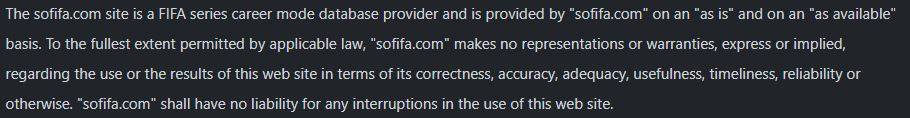

In [99]:
Image(filename='images/terms.JPG')

In [40]:
df.dtypes

player_url    object
short_name    object
long_name     object
age            int64
dob           object
               ...  
lb            object
lcb           object
cb            object
rcb           object
rb            object
Length: 103, dtype: object